In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set_theme(style='darkgrid')

# Utilities: Internal supporting functions

These have been externalized and are being imported from utils_practical_2.py file

In [3]:
# import the common utility functions created as part of this assignment
import utils_practical_2 as my_utils

# Data Inspection

In [5]:
# Read the data - we use the get_cleansed_data() function, which returns the finalized data,
# but will continue to use the vehicles_raw during the data investigation - this way, we do the
# reading and cleansing of the data in the same place

vehicles_raw, vehicles_cleansed = my_utils.get_cleansed_data()

Reading data/vehicles.csv ... Done: (426880, 18)

Cleansing price column ... 
... Removing price outliers using ModZ method ... 
... ModZ: 9450.0, med: 13950.0, const: 0.6745
... Time: 0.12265706062316895
... Removed 5,790 outliers
... Removing cars with price = 0 ...  Removed 32,895 rows
Done: (421090, 19) -> (388195, 19)

DropNA from columns: 
... year: 1,029 rows (0.27% of total): 388,195 -> 387,166
... manufacturer: 16,609 rows (4.28% of total): 388,195 -> 371,586
... fuel: 19,173 rows (4.94% of total): 388,195 -> 369,022
... title_status: 26,730 rows (6.89% of total): 388,195 -> 361,465
... odometer: 28,960 rows (7.46% of total): 388,195 -> 359,235
... transmission: 30,742 rows (7.92% of total): 388,195 -> 357,453
Done: (388195, 19) -> (360700, 19)

Dropping columns: ['mod_zscore', 'id', 'model', 'VIN']
... mod_zscore
... id
... model
... VIN
Done: (360700, 19) -> (360700, 15)

Data Transformations:
... year float -> int: Done
... odometer float -> int: Done

Category Transformati

In [6]:
vehicles_raw.head(2)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,mod_zscore
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,-0.567437
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,-0.146320


In [7]:
vehicles_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
 18  mod_

## Inspect: Nulls

In [9]:
print('Percent non-null values in each column')
vehicles_raw.isnull().sum().transform(lambda x: (1 - (x / vehicles_raw.shape[0])) * 100).round(2)

Percent non-null values in each column


id              100.00
region          100.00
price           100.00
year             99.72
manufacturer     95.87
model            98.76
condition        59.21
cylinders        58.38
fuel             99.29
odometer         98.97
title_status     98.07
transmission     99.40
VIN              62.27
drive            69.41
size             28.23
type             78.25
paint_color      69.50
state           100.00
mod_zscore      100.00
dtype: float64

In [10]:
vehicles_raw.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,426880.0,NaN,NaN,NaN,7311486634.224333,4473170.412559,7207408119.0,7308143339.25,7312620821.0,7315253543.5,7317101084.0
region,426880,404,columbus,3608,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,426880.0,NaN,NaN,NaN,75199.033187,12182282.173604,0.0,5900.0,13950.0,26485.75,3736928711.0
year,425675.0,NaN,NaN,NaN,2011.235191,9.45212,1900.0,2008.0,2013.0,2017.0,2022.0
manufacturer,409234,42,ford,70985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,421603,29649,f-150,8009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,252776,6,good,121456,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cylinders,249202,8,6 cylinders,94169,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuel,423867,5,gas,356209,NaN,NaN,NaN,NaN,NaN,NaN,NaN
odometer,422480.0,NaN,NaN,NaN,98043.331443,213881.500798,0.0,37704.0,85548.0,133542.5,10000000.0


In [11]:
vehicles_raw.describe().style.format('{:,.2f}')

,id,price,year,odometer,mod_zscore
count,"426,880.00","426,880.00","425,675.00","422,480.00","426,880.00"
mean,"7,311,486,634.22","75,199.03","2,011.24","98,043.33",4.37
std,"4,473,170.41","12,182,282.17",9.45,"213,881.50",869.52
min,"7,207,408,119.00",0.00,"1,900.00",0.00,-1.00
25%,"7,308,143,339.25","5,900.00","2,008.00","37,704.00",-0.57
50%,"7,312,620,821.00","13,950.00","2,013.00","85,548.00",0.00
75%,"7,315,253,543.50","26,485.75","2,017.00","133,542.50",0.89
max,"7,317,101,084.00","3,736,928,711.00","2,022.00","10,000,000.00","266,724.76"


## Inspect: price

Since price will be our target parameter for models, let's check it first

### Price = 0 case

In [14]:
veh_zero_price = vehicles_raw.query('price == 0')
veh_zero_price.price.value_counts()

price
0    32895
Name: count, dtype: int64

In [15]:
veh_zero_price.describe().style.format('{:,.2f}')

,id,price,year,odometer,mod_zscore
count,"32,895.00","32,895.00","32,863.00","30,785.00","32,895.00"
mean,"7,311,551,883.13",0.00,"2,013.97","89,312.68",-1.00
std,"4,484,307.42",0.00,6.36,"297,007.17",0.00
min,"7,209,027,818.00",0.00,"1,903.00",0.00,-1.00
25%,"7,308,226,344.00",0.00,"2,012.00","34,908.00",-1.00
50%,"7,312,520,029.00",0.00,"2,015.00","72,000.00",-1.00
75%,"7,315,315,941.00",0.00,"2,017.00","110,000.00",-1.00
max,"7,317,080,869.00",0.00,"2,022.00","10,000,000.00",-1.00


In [16]:
veh_zero_price_pct = (veh_zero_price.shape[0] / vehicles_raw.shape[0]) * 100
veh_zero_price_pct

7.7059126686656665

There are 32,895 cars with a zero price, 7.71% of the total - reasonable candidates for exclusion!

### Price Distribution

Let's look at the price distribution of cars with non-zero prices

In [20]:
veh_priced = vehicles_raw.query('price > 0')

<Axes: >

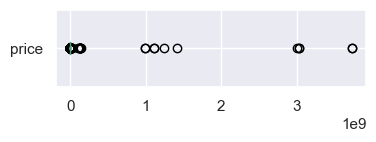

In [21]:
veh_priced.price.plot.box(vert=False, figsize=(4,1))

In [22]:
veh_priced.describe().T.style.format('{:,.2f}')

,count,mean,std,min,25%,50%,75%,max
id,"393,985.00","7,311,481,186.40","4,472,201.94","7,207,408,119.00","7,308,131,294.00","7,312,625,769.00","7,315,249,600.00","7,317,101,084.00"
price,"393,985.00","81,477.63","12,680,636.89",1.00,"7,000.00","15,000.00","27,590.00","3,736,928,711.00"
year,"392,812.00","2,011.01",9.63,"1,900.00","2,008.00","2,013.00","2,017.00","2,022.00"
odometer,"391,695.00","98,729.51","205,915.79",0.00,"38,000.00","87,000.00","135,334.00","10,000,000.00"
mod_zscore,"393,985.00",4.82,905.09,-1.00,-0.50,0.07,0.97,"266,724.76"


The price min/max is all over the place and the quartile distribution is strange - let's dig deeper into this when we look at outliers later

Let's look at cars under 100K

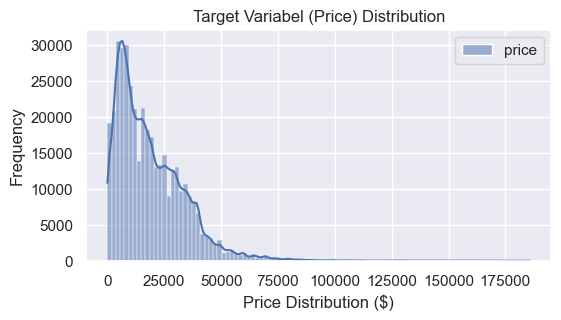

In [24]:
price_cap = 190000

plt.figure(figsize=(6, 3))
sns.histplot(vehicles_raw.query('price > 0 and price <= @price_cap')[['price']], bins=100, kde=True)

plt.xlabel(f'Price Distribution ($)')
plt.ylabel('Frequency')

plt.title(f'Target Variabel (Price) Distribution')
# plt.gca().invert_yaxis()
plt.savefig('images/price_distribution.png')
plt.show()

Massive skew - let's play with outliers now

### Price Outliers

#### Outliers Method 1: Simple quartile analysis

In [28]:
# Calculate IQR
Q1 = vehicles_raw['price'].quantile(0.25)
Q3 = vehicles_raw['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
vehicles_iqr = vehicles_raw[(vehicles_raw['price'] >= lower_bound) & (vehicles_raw['price'] <= upper_bound)]

# Plot the distribution again
# plt.figure(figsize=(10, 6))
# sns.histplot(vehicles_iqr['price'], bins=30, kde=True)
# plt.title('Price Distribution After IQR [#Orig: {:,}; Removed: {:,}]'.
#           format(vehicles_raw.shape[0], vehicles_raw.shape[0] - vehicles_iqr.shape[0]))
# plt.xlabel('Price')
# plt.ylabel('Frequency')
# plt.show()

#### Outliers Method 2: Modified z-score

Refer to the Utilities section for the remove_outliers_modz() function

In [30]:
vehicles_modZ = my_utils.remove_outliers_modz(vehicles_raw)
# vehicles_modZ

ModZ: 9450.0, med: 13950.0, const: 0.6745
Time: 0.17984390258789062


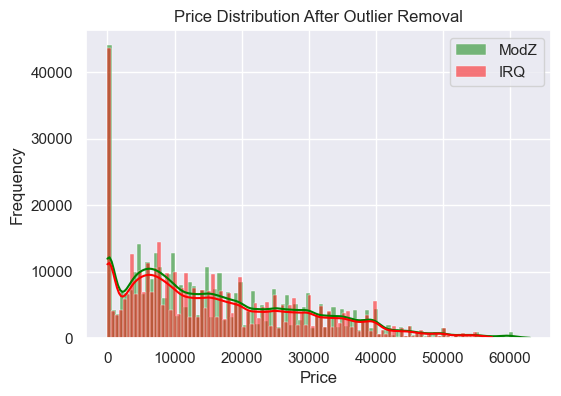

In [31]:
# Plot the distribution again
plt.figure(figsize=(6, 4))
sns.histplot(vehicles_modZ['price'], bins=100, kde=True, color='green', alpha=0.5, label='ModZ')
sns.histplot(vehicles_iqr['price'], bins=100, kde=True, color='red', alpha=0.5, label='IRQ')

plt.title('Price Distribution After Outlier Removal')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('images/price_outliers_removed.png')

plt.show()

In [32]:
print('vehicles_raw: shape: {}, min: {:,.2f}, max: {:,.2f}'.
      format(vehicles_raw.shape, vehicles_raw.price.min(), vehicles_raw.price.max()))
print('vehicles_iqr: shape: {}, min: {:,.2f}, max: {:,.2f}, Removed: {:,d}'.
      format(vehicles_iqr.shape, vehicles_iqr.price.min(), vehicles_iqr.price.max(), vehicles_raw.shape[0] - vehicles_iqr.shape[0]))
print('vehicles_modZ: shape: {}, min: {:,.2f}, max: {:,.2f}, Removed: {:,d}'.
      format(vehicles_modZ.shape, vehicles_modZ.price.min(), vehicles_modZ.price.max(), vehicles_raw.shape[0] - vehicles_modZ.shape[0]))

vehicles_raw: shape: (426880, 19), min: 0.00, max: 3,736,928,711.00
vehicles_iqr: shape: (418703, 19), min: 0.00, max: 57,341.00, Removed: 8,177
vehicles_modZ: shape: (421090, 19), min: 0.00, max: 62,981.00, Removed: 5,790


Based on the above distribution ModZ preserved more data samples, i.e. removed only 5,790 instead of 8,177 priced vehicles, so let's analyze this further.

In [34]:
# Which set of vehicles are we looking at ...
# vehicles_sel = vehicles_raw
vehicles_sel = vehicles_modZ

In [35]:
vehicles_sel.describe().T.style.format('{:,.2f}')

,count,mean,std,min,25%,50%,75%,max
id,"421,090.00","7,311,485,749.33","4,473,251.79","7,207,408,119.00","7,308,145,995.25","7,312,617,063.00","7,315,252,755.50","7,317,101,084.00"
price,"421,090.00","16,588.75","13,510.01",0.00,"5,800.00","13,500.00","25,988.00","62,981.00"
year,"420,029.00","2,011.19",9.38,"1,900.00","2,008.00","2,013.00","2,017.00","2,022.00"
odometer,"416,750.00","98,859.49","214,470.24",0.00,"38,922.00","86,830.00","134,231.00","10,000,000.00"
mod_zscore,"421,090.00",0.19,0.96,-1.00,-0.58,-0.03,0.86,3.50


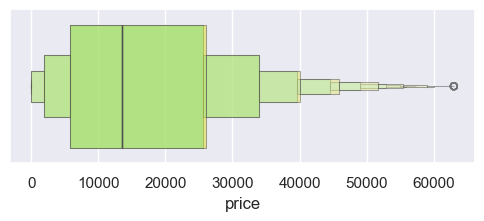

In [36]:
plt.figure(figsize=(6,2))
sns.boxenplot(data=vehicles_iqr, x='price', alpha=0.5, color='cyan')
sns.boxenplot(data=vehicles_modZ, x='price', alpha=0.5, color='yellow')
plt.show()

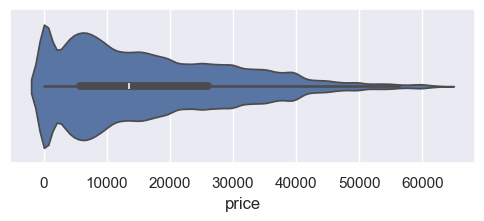

In [37]:
plt.figure(figsize=(6,2))
sns.violinplot(data=vehicles_sel, x='price')
plt.show()

### Price segmentation analysis

Looking at the above violin plot, let's look at price-based segments, **there seems to be at least a low- and mid-price band with a long tail that can be high-priced autos**

#### Market Research Resources 

1. [Auto Remarketing, July 2023: Mid-Year Market Report: Dissecting used-car pricing, segment trends, CPO sales & more](http://digital.autoremarketing.com/publication/frame.php?i=794065&p=&pn=&ver=html5&view=articleBrowser&article_id=4594802)

    * "Avearge used vehicle transaction price in the first quaretr actually dipped by 6.4% year-over-year to \\$28,381, compared to \\$30,329 in Q1 2022"

<Axes: xlabel='price', ylabel='Count'>

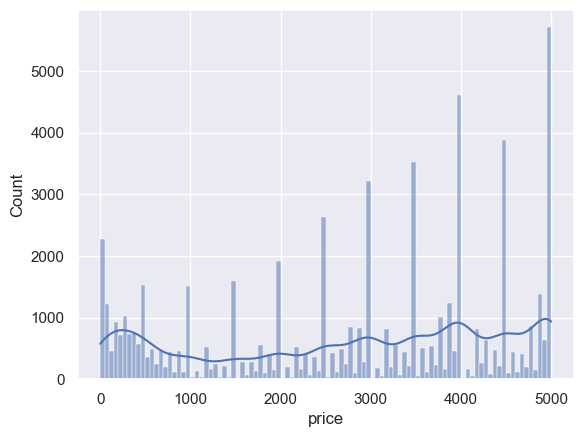

In [39]:
low_price_max = 5000
veh_low_priced = vehicles_sel.query('price > 0 and price <= @low_price_max')
sns.histplot(veh_low_priced.price, bins=100, kde=True)

In [40]:
veh_low_price_upto_1000 = vehicles_sel.query('price > 0 and price <= 1000')
veh_low_price_upto_2000 = vehicles_sel.query('price > 1000 and price <= 2000')
veh_low_price_upto_3000 = vehicles_sel.query('price > 2000 and price <= 3000')
veh_low_price_upto_4000 = vehicles_sel.query('price > 3000 and price <= 4000')
veh_low_price_upto_5000 = vehicles_sel.query('price > 4000 and price <= 5000')

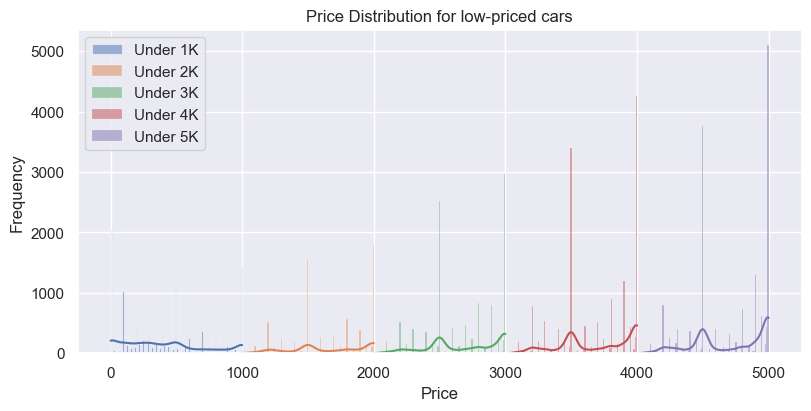

In [41]:
# Plot the distribution again
plt.figure(figsize=(8, 4), layout='constrained')
sns.histplot(veh_low_price_upto_1000.price, bins=100, kde=True, label='Under 1K', multiple='dodge')
sns.histplot(veh_low_price_upto_2000.price, bins=100, kde=True, label='Under 2K', multiple='dodge')
sns.histplot(veh_low_price_upto_3000.price, bins=100, kde=True, label='Under 3K', multiple='dodge')
sns.histplot(veh_low_price_upto_4000.price, bins=100, kde=True, label='Under 4K', multiple='dodge')
sns.histplot(veh_low_price_upto_5000.price, bins=100, kde=True, label='Under 5K', multiple='dodge')

plt.title('Price Distribution for low-priced cars')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Pricing Findings

* There are 32,895 cars with a zero price, 7.71% of the total (426,880) - these are candidates for exclusion pending further analysis
* The price distribution shows an extreme right-skew with a long-tail with a few outliers beyond \\$100K price point
* Analyzed outliers using two separate methods (quantile analysis and Modified z-score)
    * ModZ performed better, i.e. preserved more data samples - removing only 5,790 instead of 8,177 priced vehicles
* Looking at the distribution of priced cars, i.e. cars in the sample dataset that have pricing informaion:
    * There seems to be **at least a low- and mid-price band with a long tail that represents high-priced autos**
    * Market research on used-car prices showed an average Q12023 price of \\$28,381

**Candidate Dataset**: Based on the above findings, these are three potential price-based segments of cars with prices:

* Low-priced cars: Under \\$5K
* Mid-priced cars: \\$5K - \\$50K
* High-priced cars: ABove \\$50K

![](images/candidate-price-segments.png)


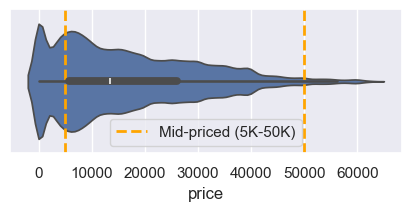

In [43]:
plt.figure(figsize=(4,2), layout='constrained')
plt.axvline(x=5000, color='orange', linestyle='--', linewidth=2, label='Mid-priced (5K-50K)')
plt.axvline(x=50000, color='orange', linestyle='--', linewidth=2)
sns.violinplot(data=vehicles_sel, x='price')
plt.show()

In [44]:
# Final candidate: Priced cars (price > 0) with outliers removed
veh_priced_no_outliers = vehicles_sel.query('price > 0')
vehicles_sel = veh_priced_no_outliers

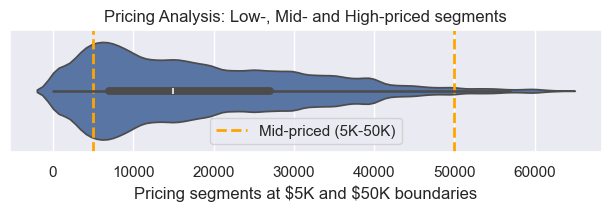

In [45]:
plt.figure(figsize=(6,2), layout='constrained')
plt.axvline(x=5000, color='orange', linestyle='--', linewidth=2, label='Mid-priced (5K-50K)')
plt.axvline(x=50000, color='orange', linestyle='--', linewidth=2)
sns.violinplot(data=veh_priced_no_outliers, x='price')

plt.title('Pricing Analysis: Low-, Mid- and High-priced segments')
plt.xlabel('Pricing segments at \\$5K and \\$50K boundaries')
plt.savefig('images/candidate-price-segments.png')
plt.show()

In [46]:
# Drop mod z-score column - we're done with outliers
vehicles_sel = vehicles_sel.drop('mod_zscore', axis=1)
vehicles_sel.shape

(388195, 18)

## Inspect: id

Analyzing the candidate dataset up to this point, showed NO null or duplicated data as it is a **unique ID** column

**Actions**

* We will _remove this column_ as it would affect the data modeling
* We may come back to this after initial modeling

In [48]:
col='id'
raw_null_c = vehicles_raw[col].isnull().sum()
sel_null_c = vehicles_sel[col].isnull().sum()
print('NULL - {}: raw: {:,d} sel: {:,d} => pct: {:,.2f}%'
      .format(col, raw_null_c, sel_null_c, (sel_null_c / vehicles_sel.shape[0]) * 100))

NULL - id: raw: 0 sel: 0 => pct: 0.00%


In [49]:
col='id'
raw_null_c = vehicles_raw[col].duplicated().sum()
sel_null_c = vehicles_sel[col].duplicated().sum()
print('DUPES - {}: raw: {:,d} sel: {:,d} => pct: {:,.2f}%'
      .format(col, raw_null_c, sel_null_c, (sel_null_c / vehicles_sel.shape[0]) * 100))

DUPES - id: raw: 0 sel: 0 => pct: 0.00%


In [50]:
vehicles_sel = vehicles_sel.drop('id', axis=1)
vehicles_sel.shape

(388195, 17)

## Inspect: condition

1. There are 163,851 null values (40.55% of total)
2. This is a very high percentage, so we cannot simply remove these rows

**Actions**

* Intuitively, condition is likely a large determinant of final price, so we will leave all these values and take this into consideration during modeling
* Convert column type to Category

In [52]:
print('condition.isnull(): raw: {:,d} sel: {:,d}'.format(vehicles_raw.condition.isnull().sum(), vehicles_sel.condition.isnull().sum()))

condition.isnull(): raw: 174,104 sel: 147,637


In [53]:
col='condition'
raw_null_c = vehicles_raw[col].isnull().sum()
sel_null_c = vehicles_sel[col].isnull().sum()
print('NULL - {}: raw: {:,d} sel: {:,d} => pct: {:,.2f}%'
      .format(col, raw_null_c, sel_null_c, (sel_null_c / vehicles_sel.shape[0]) * 100))

NULL - condition: raw: 174,104 sel: 147,637 => pct: 38.03%


In [54]:
my_utils.value_counts_2df(vehicles_raw, vehicles_sel, 'Raw#', 'Sel#', 'condition', dropna=False)

,condition,Raw#,Sel#
0,excellent,101467,93897
1,fair,6769,6715
2,good,121456,118761
3,like new,21178,19576
4,new,1305,1014
5,salvage,601,595
6,0,174104,147637


In [55]:
# Convert to Category
vehicles_sel[col] = vehicles_sel[col].astype('category')
vehicles_sel[col].dtype

CategoricalDtype(categories=['excellent', 'fair', 'good', 'like new', 'new', 'salvage'], ordered=False, categories_dtype=object)

## Inspect: VIN

Analyzing the candidate dataset up to this point, showed a large number of null and duplicated data:

* Nulls: 159,512 representing 37.88% of samples
* Duplicates: 304,422 representing 72.29% of samples

**Actions**

Given that VIN is a unique value like `id` and will impact the modeling, we will drop this column from the dataset

In [57]:
col='VIN'
raw_null_c = vehicles_raw[col].isnull().sum()
sel_null_c = vehicles_sel[col].isnull().sum()
print('NULL - {}: raw: {:,d} sel: {:,d} => pct: {:,.2f}%'
      .format(col, raw_null_c, sel_null_c, (sel_null_c / vehicles_sel.shape[0]) * 100))

NULL - VIN: raw: 161,042 sel: 150,628 => pct: 38.80%


In [58]:
col='VIN'
raw_null_c = vehicles_raw[col].duplicated().sum()
sel_null_c = vehicles_sel[col].duplicated().sum()
print('DUPES - {}: raw: {:,d} sel: {:,d} => pct: {:,.2f}%'
      .format(col, raw_null_c, sel_null_c, (sel_null_c / vehicles_sel.shape[0]) * 100))

DUPES - VIN: raw: 308,633 sel: 284,013 => pct: 73.16%


In [59]:
vehicles_sel = vehicles_sel.drop(col, axis=1)
vehicles_sel.shape

(388195, 16)

## Inspect: year

1. There are 1,061 null values (0.25% of total)

**Actions**
* Let's drop the nulls to get a clean data set
* Convert column type to int

In [61]:
col='year'
raw_null_c = vehicles_raw[col].isnull().sum()
sel_null_c = vehicles_sel[col].isnull().sum()
print('NULL - {}: raw: {:,d} sel: {:,d} => pct: {:,.2f}%'
      .format(col, raw_null_c, sel_null_c, (sel_null_c / vehicles_sel.shape[0]) * 100))

NULL - year: raw: 1,205 sel: 1,029 => pct: 0.27%


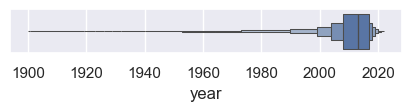

In [62]:
plt.figure(figsize=(4,1), layout='constrained')
sns.boxenplot(data=vehicles_sel, x='year')
plt.show()

In [63]:
# Removing null values from column
vehicles_sel.dropna(subset=['year'], axis='index', inplace=True)
vehicles_sel.shape

(387166, 16)

In [64]:
# Convert to Category
vehicles_sel[col] = vehicles_sel[col].astype(int)
vehicles_sel[col].dtype

dtype('int64')

## Inspect: odometer

1. There are 4,400 null values (0.90% of total)
2. There are also some very high values which we can remove later after modeling if needed

**Actions**

* Let's drop the nulls to get a clean data set
* Convert dtype to float

In [66]:
col='odometer'
raw_null_c = vehicles_raw[col].isnull().sum()
sel_null_c = vehicles_sel[col].isnull().sum()
print('NULL - {}: raw: {:,d} sel: {:,d} => pct: {:,.2f}%'
      .format(col, raw_null_c, sel_null_c, (sel_null_c / vehicles_sel.shape[0]) * 100))

NULL - odometer: raw: 4,400 sel: 2,167 => pct: 0.56%


In [67]:
vehicles_sel.describe()[['odometer']].T.style.format('{:,.2f}')

,count,mean,std,min,25%,50%,75%,max
odometer,"384,999.00","99,804.57","206,675.82",0.00,"39,482.00","88,624.00","136,255.00","10,000,000.00"


Let's see what the distribution of cars based on a lo/hi cutoff milaage to see what the effect of this would be?

In [69]:
odo_cutoff_lo = 0
lo = vehicles_sel.query('odometer <= @odo_cutoff_lo')
odo_cutoff_hi = 500000
temp = vehicles_sel.query('odometer > @odo_cutoff_lo and odometer <= @odo_cutoff_hi')
print('Odometer Cutoff: {:,d} ({:,.2f}%) <= lo({:,d}) <= {:,d} ({:,.2f}%) < hi({:,d}) < {:,d} ({:,.2f}%)'
      .format(lo.shape[0], ((lo.shape[0] / vehicles_sel.shape[0]) * 100), 
              odo_cutoff_lo,
              temp.shape[0], ((temp.shape[0] / vehicles_sel.shape[0]) * 100),
              odo_cutoff_hi, 
              vehicles_sel.shape[0] - temp.shape[0], ((1 - temp.shape[0] / vehicles_sel.shape[0]) * 100)))

Odometer Cutoff: 1,084 (0.28%) <= lo(0) <= 382,709 (98.85%) < hi(500,000) < 4,457 (1.15%)


In [70]:
len(vehicles_sel.query('odometer == 0'))

1084

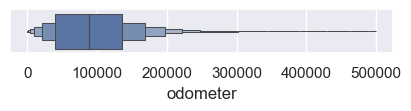

In [71]:
plt.figure(figsize=(4,1), layout='constrained')
# sns.histplot(data=temp, x=col)
sns.boxenplot(data=temp, x=col)
plt.show()

In [72]:
# Removing null values from column
vehicles_sel.dropna(subset=['odometer'], axis='index', inplace=True)
vehicles_sel.shape

(384999, 16)

In [73]:
vehicles_sel['odometer'] = vehicles_sel['odometer'].astype(int)

## Inspect: manufacturer

1. There are 15,983 null values (3.81% of total)

**Let's drop the nulls to get a clean data set**

In [75]:
col='manufacturer'
raw_null_c = vehicles_raw[col].isnull().sum()
sel_null_c = vehicles_sel[col].isnull().sum()
print('NULL - {}: raw: {:,d} sel: {:,d} => pct: {:,.2f}%'
      .format(col, raw_null_c, sel_null_c, (sel_null_c / vehicles_sel.shape[0]) * 100))

NULL - manufacturer: raw: 17,646 sel: 14,503 => pct: 3.77%


In [76]:
my_utils.value_counts_2df(vehicles_raw, vehicles_sel, 'Raw#', 'Sel#', col, dropna=False).head()

,manufacturer,Raw#,Sel#
0,acura,5978,5673
1,alfa-romeo,897,866
2,aston-martin,24,11
3,audi,7573,7014
4,bmw,14699,13592


In [77]:
# Removing null values from column
vehicles_sel.dropna(subset=['manufacturer'], axis='index', inplace=True)
vehicles_sel.shape

(370496, 16)

In [78]:
# Convert to Category
vehicles_sel[col] = vehicles_sel[col].astype('category')
vehicles_sel[col].dtype

CategoricalDtype(categories=['acura', 'alfa-romeo', 'aston-martin', 'audi', 'bmw',
                  'buick', 'cadillac', 'chevrolet', 'chrysler', 'datsun',
                  'dodge', 'ferrari', 'fiat', 'ford', 'gmc', 'harley-davidson',
                  'honda', 'hyundai', 'infiniti', 'jaguar', 'jeep', 'kia',
                  'land rover', 'lexus', 'lincoln', 'mazda', 'mercedes-benz',
                  'mercury', 'mini', 'mitsubishi', 'morgan', 'nissan',
                  'pontiac', 'porsche', 'ram', 'rover', 'saturn', 'subaru',
                  'tesla', 'toyota', 'volkswagen', 'volvo'],
, ordered=False, categories_dtype=object)

## Inspect: model

1. Null count is 4,943 (1.22% of total)
2. This is a string field, but has a lot of noise - we should not use it during modeling

**Actions**

* We will _remove this column_ as it would affect the data modeling. We may come back to this after initial modeling

In [80]:
col='model'
raw_null_c = vehicles_raw[col].isnull().sum()
sel_null_c = vehicles_sel[col].isnull().sum()
print('NULL - {}: raw: {:,d} sel: {:,d} => pct: {:,.2f}%'
      .format(col, raw_null_c, sel_null_c, (sel_null_c / vehicles_sel.shape[0]) * 100))

NULL - model: raw: 5,277 sel: 4,368 => pct: 1.18%


In [81]:
my_utils.value_counts_2df(vehicles_raw, vehicles_sel, 'Raw#', 'Sel#', col, dropna=False).head()

,model,Raw#,Sel#
0,"""t""",1,1
1,#NAME?,41,10
2,"$362.47, $1000 down, oac, 2.9%apr $362.47,luxu...",1,1
3,%,1,0
4,& altima,1,1


In [82]:
vehicles_sel = vehicles_sel.drop('model', axis='columns')
vehicles_sel.shape

(370496, 15)

## Inspect: cylinders

1. Null count is 166,981 (41.33% of total)
2. There are also 1,002 rows with a value of 'other'
3. This is a string field, but has a lot of noise - we should not use it during modeling

**Actions**

* Intuitively, cylinders is likely a large determinant of final price, so we will leave all these values and take this into consideration during modeling
* Convert dtype to Category


In [84]:
col='cylinders'
raw_null_c = vehicles_raw[col].isnull().sum()
sel_null_c = vehicles_sel[col].isnull().sum()
print('NULL - {}: raw: {:,d} sel: {:,d} => pct: {:,.2f}%'
      .format(col, raw_null_c, sel_null_c, (sel_null_c / vehicles_sel.shape[0]) * 100))

NULL - cylinders: raw: 177,678 sel: 149,847 => pct: 40.44%


In [85]:
my_utils.value_counts_2df(vehicles_raw, vehicles_sel, 'Raw#', 'Sel#', col, dropna=False)

,cylinders,Raw#,Sel#
0,10 cylinders,1455,1287
1,12 cylinders,209,100
2,3 cylinders,655,509
3,4 cylinders,77642,69942
4,5 cylinders,1712,1522
5,6 cylinders,94169,84601
6,8 cylinders,72062,61887
7,other,1298,801
8,0,177678,149847


In [86]:
# Convert to Category
vehicles_sel[col] = vehicles_sel[col].astype('category')
vehicles_sel[col].dtype

CategoricalDtype(categories=['10 cylinders', '12 cylinders', '3 cylinders', '4 cylinders',
                  '5 cylinders', '6 cylinders', '8 cylinders', 'other'],
, ordered=False, categories_dtype=object)

## Inspect: fuel

1. Null count is 2,532 (0.63% of total)
2. This is a string field and could contribute to the price models once the nulls are removed

**Actions**

* Let's drop the nulls to get a clean data set
* Convert dtype to Category

In [88]:
col='fuel'
raw_null_c = vehicles_raw[col].isnull().sum()
sel_null_c = vehicles_sel[col].isnull().sum()
print('NULL - {}: raw: {:,d} sel: {:,d} => pct: {:,.2f}%'
      .format(col, raw_null_c, sel_null_c, (sel_null_c / vehicles_sel.shape[0]) * 100))

NULL - fuel: raw: 3,013 sel: 1,943 => pct: 0.52%


In [89]:
my_utils.value_counts_2df(vehicles_raw, vehicles_sel, 'Raw#', 'Sel#', col, dropna=False)

,fuel,Raw#,Sel#
0,diesel,30062,20593
1,electric,1698,1493
2,gas,356209,315355
3,hybrid,5170,4797
4,other,30728,26315
5,0,3013,1943


In [90]:
# Removing null values from column
vehicles_sel.dropna(subset=['fuel'], axis='index', inplace=True)
vehicles_sel.shape

(368553, 15)

In [91]:
# Convert to Category
vehicles_sel[col] = vehicles_sel[col].astype('category')
vehicles_sel[col].dtype

CategoricalDtype(categories=['diesel', 'electric', 'gas', 'hybrid', 'other'], ordered=False, categories_dtype=object)

## Inspect: title_status

1. Null count is 6,612 (1.65% of total)
2. This is a string field and could contribute to the price models once the nulls are removed

**Actions**

* Let's drop the nulls to get a clean data set
* Convert dtype to Category

In [93]:
col='title_status'
raw_null_c = vehicles_raw[col].isnull().sum()
sel_null_c = vehicles_sel[col].isnull().sum()
print('NULL - {}: raw: {:,d} sel: {:,d} => pct: {:,.2f}%'
      .format(col, raw_null_c, sel_null_c, (sel_null_c / vehicles_sel.shape[0]) * 100))

NULL - title_status: raw: 8,242 sel: 6,475 => pct: 1.76%


In [94]:
my_utils.value_counts_2df(vehicles_raw, vehicles_sel, 'Raw#', 'Sel#', col, dropna=False)

,title_status,Raw#,Sel#
0,clean,405117,349502
1,lien,1422,1307
2,missing,814,624
3,parts only,198,145
4,rebuilt,7219,6837
5,salvage,3868,3663
6,0,8242,6475


In [95]:
# Removing null values from column
vehicles_sel.dropna(subset=['title_status'], axis='index', inplace=True)
vehicles_sel.shape

(362078, 15)

In [96]:
# Convert to Category
vehicles_sel[col] = vehicles_sel[col].astype('category')
vehicles_sel[col].dtype

CategoricalDtype(categories=['clean', 'lien', 'missing', 'parts only', 'rebuilt',
                  'salvage'],
, ordered=False, categories_dtype=object)

## Inspect: state

1. There are no nulls
2. This is a string field and there are 50 states plus the DC federal district that can affect price models

**Actions**

* Leave data unchanged
* Convert dtype to Category

In [98]:
col='state'
raw_null_c = vehicles_raw[col].isnull().sum()
sel_null_c = vehicles_sel[col].isnull().sum()
print('NULL - {}: raw: {:,d} sel: {:,d} => pct: {:,.2f}%'
      .format(col, raw_null_c, sel_null_c, (sel_null_c / vehicles_sel.shape[0]) * 100))

NULL - state: raw: 0 sel: 0 => pct: 0.00%


In [99]:
my_utils.value_counts_2df(vehicles_raw, vehicles_sel, 'Raw#', 'Sel#', col, dropna=False).head()

,state,Raw#,Sel#
0,ak,3474,3289
1,al,4955,4248
2,ar,4038,3079
3,az,8679,7468
4,ca,50614,40505


In [100]:
# Convert to Category
vehicles_sel[col] = vehicles_sel[col].astype('category')
vehicles_sel[col].dtype

CategoricalDtype(categories=['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl',
                  'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma',
                  'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne',
                  'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri',
                  'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv',
                  'wy'],
, ordered=False, categories_dtype=object)

## Inspect: region

1. There are no nulls
2. This is a string field and there are 404 distinct regions that can affect price models

**Actions**
* Leave unchanged

In [102]:
col='region'
raw_null_c = vehicles_raw[col].isnull().sum()
sel_null_c = vehicles_sel[col].isnull().sum()
print('NULL - {}: raw: {:,d} sel: {:,d} => pct: {:,.2f}%'
      .format(col, raw_null_c, sel_null_c, (sel_null_c / vehicles_sel.shape[0]) * 100))

NULL - region: raw: 0 sel: 0 => pct: 0.00%


In [103]:
my_utils.value_counts_2df(vehicles_raw, vehicles_sel, 'Raw#', 'Sel#', col, dropna=False)

,region,Raw#,Sel#
0,SF bay area,2936,2492
1,abilene,235,208
2,akron / canton,2211,2115
3,albany,2537,2255
4,albuquerque,2952,2275
...,...,...,...
399,york,777,649
400,youngstown,664,621
401,yuba-sutter,1747,1434
402,yuma,335,235


## Inspect: transmission

1. There are 1,378 null values (0.38% of total)

**Actions**

* Let's drop the nulls to get a clean data set
* Convert dtype to Category

In [105]:
col='transmission'
raw_null_c = vehicles_raw[col].isnull().sum()
sel_null_c = vehicles_sel[col].isnull().sum()
print('NULL - {}: raw: {:,d} sel: {:,d} => pct: {:,.2f}%'
      .format(col, raw_null_c, sel_null_c, (sel_null_c / vehicles_sel.shape[0]) * 100))

NULL - transmission: raw: 2,556 sel: 1,378 => pct: 0.38%


In [106]:
my_utils.value_counts_2df(vehicles_raw, vehicles_sel, 'Raw#', 'Sel#', col, dropna=False)

,transmission,Raw#,Sel#
0,automatic,336524,281732
1,manual,25118,20456
2,other,62682,58512
3,0,2556,1378


In [107]:
# Removing null values from column
vehicles_sel.dropna(subset=['transmission'], axis='index', inplace=True)
vehicles_sel.shape

(360700, 15)

In [108]:
# Convert to Category
vehicles_sel[col] = vehicles_sel[col].astype('category')
vehicles_sel[col].dtype

CategoricalDtype(categories=['automatic', 'manual', 'other'], ordered=False, categories_dtype=object)

## Inspect: drive

1. There are 108,118 null values (29.97% of total)

**Actions**

* Intuitively, drive is likely a determinant of final price, so we will leave all these values and take this into consideration during modeling
* Convert dtype to Category

In [110]:
col='drive'
raw_null_c = vehicles_raw[col].isnull().sum()
sel_null_c = vehicles_sel[col].isnull().sum()
print('NULL - {}: raw: {:,d} sel: {:,d} => pct: {:,.2f}%'
      .format(col, raw_null_c, sel_null_c, (sel_null_c / vehicles_sel.shape[0]) * 100))

NULL - drive: raw: 130,567 sel: 108,118 => pct: 29.97%


In [111]:
my_utils.value_counts_2df(vehicles_raw, vehicles_sel, 'Raw#', 'Sel#', col, dropna=False)

,drive,Raw#,Sel#
0,4wd,131904,110988
1,fwd,105517,92388
2,rwd,58892,49206
3,0,130567,108118


In [112]:
# Convert to Category
vehicles_sel[col] = vehicles_sel[col].astype('category')
vehicles_sel[col].dtype

CategoricalDtype(categories=['4wd', 'fwd', 'rwd'], ordered=False, categories_dtype=object)

## Inspect: size

1. There are 256,362 null values (71.07% of total)

**Actions**

* Intuitively, size is likely a determinant of final price, so we will leave all these values and take this into consideration during modeling
* Convert dtype to Category


In [114]:
col='size'
raw_null_c = vehicles_raw[col].isnull().sum()
sel_null_c = vehicles_sel[col].isnull().sum()
print('NULL - {}: raw: {:,d} sel: {:,d} => pct: {:,.2f}%'
      .format(col, raw_null_c, sel_null_c, (sel_null_c / vehicles_sel.shape[0]) * 100))

NULL - size: raw: 306,361 sel: 256,362 => pct: 71.07%


In [115]:
my_utils.value_counts_2df(vehicles_raw, vehicles_sel, 'Raw#', 'Sel#', col, dropna=False)

,size,Raw#,Sel#
0,compact,19384,16450
1,full-size,63465,54756
2,mid-size,34476,30576
3,sub-compact,3194,2556
4,0,306361,256362


In [116]:
# Convert to Category
vehicles_sel[col] = vehicles_sel[col].astype('category')
vehicles_sel[col].dtype

CategoricalDtype(categories=['compact', 'full-size', 'mid-size', 'sub-compact'], ordered=False, categories_dtype=object)

## Inspect: type

1. There are 78,400 null values (21.74% of total)

**Actions**

* Intuitively, type is likely a determinant of final price, so we will leave all these values and take this into consideration during modeling
* Convert dtype to Category

In [118]:
col='type'
raw_null_c = vehicles_raw[col].isnull().sum()
sel_null_c = vehicles_sel[col].isnull().sum()
print('NULL - {}: raw: {:,d} sel: {:,d} => pct: {:,.2f}%'
      .format(col, raw_null_c, sel_null_c, (sel_null_c / vehicles_sel.shape[0]) * 100))

NULL - type: raw: 92,858 sel: 78,400 => pct: 21.74%


In [119]:
my_utils.value_counts_2df(vehicles_raw, vehicles_sel, 'Raw#', 'Sel#', col, dropna=False).head()

,type,Raw#,Sel#
0,SUV,77284,65236
1,bus,517,300
2,convertible,7731,6449
3,coupe,19204,16033
4,hatchback,16598,14398


In [120]:
# Convert to Category
vehicles_sel[col] = vehicles_sel[col].astype('category')
vehicles_sel[col].dtype

CategoricalDtype(categories=['SUV', 'bus', 'convertible', 'coupe', 'hatchback',
                  'mini-van', 'offroad', 'other', 'pickup', 'sedan', 'truck',
                  'van', 'wagon'],
, ordered=False, categories_dtype=object)

## Inspect: paint_color

1. There are 102,994 null values (28.55% of total)

**Intuitively, paint_color can be a determinant of final price, so we will leave all these values and take this into consideration during modeling**


In [122]:
col='paint_color'
raw_null_c = vehicles_raw[col].isnull().sum()
sel_null_c = vehicles_sel[col].isnull().sum()
print('NULL - {}: raw: {:,d} sel: {:,d} => pct: {:,.2f}%'
      .format(col, raw_null_c, sel_null_c, (sel_null_c / vehicles_sel.shape[0]) * 100))

NULL - paint_color: raw: 130,203 sel: 102,994 => pct: 28.55%


In [123]:
my_utils.value_counts_2df(vehicles_raw, vehicles_sel, 'Raw#', 'Sel#', col, dropna=False).head()

,paint_color,Raw#,Sel#
0,black,62861,55045
1,blue,31223,27657
2,brown,6593,5920
3,custom,6700,5921
4,green,7343,6386


In [124]:
# Convert to Category
vehicles_sel[col] = vehicles_sel[col].astype('category')
vehicles_sel[col].dtype

CategoricalDtype(categories=['black', 'blue', 'brown', 'custom', 'green', 'grey',
                  'orange', 'purple', 'red', 'silver', 'white', 'yellow'],
, ordered=False, categories_dtype=object)

Let's cross-check that the raw, selected for inclusion in this data investigation and cleansed data sets all agree. This is to ensure that the ```get_cleansed_data()``` function has included all the learnings of the Data Inspection above.

In [126]:
crosscheck = 'PASSED' if (vehicles_cleansed.shape[0] == vehicles_sel.shape[0]
                          and vehicles_cleansed.shape[1] == vehicles_sel.shape[1]) else 'FAILED'
print('CROSSCHECK {}: raw: {} , cleansed: {}, sel: {}'
      .format(crosscheck, vehicles_raw.shape[0], vehicles_cleansed.shape, vehicles_sel.shape))

CROSSCHECK PASSED: raw: 426880 , cleansed: (360700, 15), sel: (360700, 15)


In [127]:
vehicles_sel.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
region,360700,404,columbus,3170,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,360700.0,NaN,NaN,NaN,18091.568775,13071.727526,1.0,7000.0,14999.0,26990.0,62981.0
year,360700.0,NaN,NaN,NaN,2011.178007,9.122806,1900.0,2008.0,2013.0,2017.0,2022.0
manufacturer,360700,42,ford,61351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,223668,6,good,113394,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cylinders,213522,8,6 cylinders,81791,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuel,360700,5,gas,308197,NaN,NaN,NaN,NaN,NaN,NaN,NaN
odometer,360700.0,NaN,NaN,NaN,98543.503208,195802.978631,0.0,39283.0,88632.0,136079.0,10000000.0
title_status,360700,6,clean,348127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transmission,360700,3,automatic,281732,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Multi-variate analysis

Based on market research, we can segment the inventory as follows to see pricing patterns and directions for model development:

* Budget
    * price under 5K (or 10K)
    * 8+ years old
    * 100K+ miles
* Entry
    * price 10-15K
    * 5-8 years old
    * 60-100K miles
* Mid
    * price 15-25K
    * 3-6 years old
    * 40-60K miles
* Upper
    * price 25-35K
    * 1-4 years old
    * under 30K miles
* Premium
    * price above 35K
    * 1-3 years old
    * under 20K miles

Here we look at ```<price, model_year, odometer, condition>``` relationships to guide us beyond this data investigation.

In [129]:
# Create some small datasets to speed up debugging
veh_sample_5K = vehicles_sel.sample(n=5000, random_state=42)
veh_sample_10K = vehicles_sel.sample(n=10000, random_state=42)
veh_sample_25K = vehicles_sel.sample(n=25000, random_state=42)
veh_sample_50K = vehicles_sel.sample(n=50000, random_state=42)
# veh_sample_5K.head(2)

In [130]:
veh_budget = vehicles_sel.query('price <= 10000 and year <= 2016 and odometer >= 100000')
veh_entry = vehicles_sel.query('(price>=10000 and price<=15000) and (year>=2016 and year<=2019) and (odometer>=60000 and odometer<=100000)')
veh_mid = vehicles_sel.query('(price>=15000 and price<=25000) and (year>=2019 and year<=2021) and (odometer>=40000 and odometer<=60000)')
veh_upper = vehicles_sel.query('(price>=25000 and price<=35000) and (year>=2021 and year<=2023) and (odometer<=30000)')
veh_premium = vehicles_sel.query('(price>=35000) and (year>=2022) and (odometer<=20000)')

### Price

In [132]:
veh_focus = veh_budget

In [133]:
# plt.figure(figsize=(6,4), layout='constrained')
# sns.scatterplot(data=veh_focus, x='price', y='year', hue='condition')
# plt.show()

In [134]:
# sns.pairplot(veh_focus, hue='year')

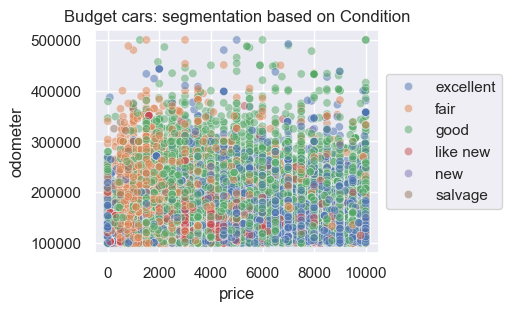

In [135]:
# mask out the noise
temp = veh_focus.query('odometer > @odo_cutoff_lo and odometer <= @odo_cutoff_hi')

plt.figure(figsize=(5,3), layout='constrained')
g = sns.scatterplot(data=temp, x='price', y='odometer', hue='condition', alpha=0.5)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Budget cars: segmentation based on Condition')
plt.savefig('images/scatter-price-odo-condition-budget.png')

Hmm, definitely ```condition``` patterns around the price range - maybe applying clustering models?

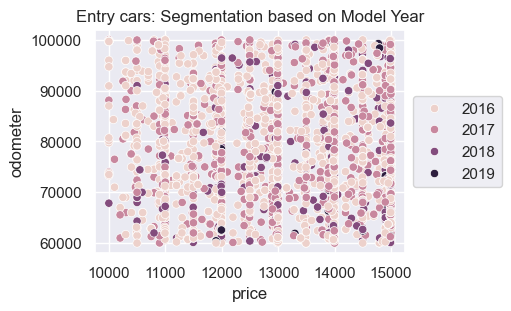

In [137]:
plt.figure(figsize=(5,3), layout='constrained')
g = sns.scatterplot(data=veh_entry, x='price', y='odometer', hue='year')#, alpha=0.5)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Entry cars: Segmentation based on Model Year')
plt.savefig('images/scatter-price-odo-year-entry.png')
plt.show()

Looking at another segment against the ```year``` axis, shows similar price correlation where age compensates for miles driven.

# Summary of Data Investigation

## Goals

* Clean the data to optimize data mining
    * Remove noise: There is a lot of noisy data that will hamper model training
* Identify guidelines for data gathering for future work

## What we learned

Based on the above investigation, we now have cleansed data that is fairly high-quality:

* Removed null data and outliers
* Removed unnecessary features

## Next steps

We now move to the next step, using ML techniques to help us understand the data better and develop pricing prediction models to help the customer manage their inventory:

* Based on market research .... ```<price, year, condition, odometer>``` ... there are correlations to price that suggest clusters of _like_ inventory - this suggest applying clustering algorithms to the cleaned data
* There are other attributes that could also be important that are not apparent yet - this suggests applying fetaure engineering techniques to identify the important attributes that may affect price that could guide acquisitions to drive future revenue
